In [30]:
# example of loading the generator model and generating images
from numpy.random import randn
from tensorflow.keras.models import load_model
from matplotlib import pyplot
from numpy import asarray

In [2]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim*n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

In [27]:
# create a plot of generated images
def plot_generated_images(examples, n, size, name):
    pyplot.figure(figsize=(size,size))
    for i in range(n*n):
        pyplot.subplot(n,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i,:,:])
    pyplot.savefig(f'{name}.jpg')
    pyplot.show()

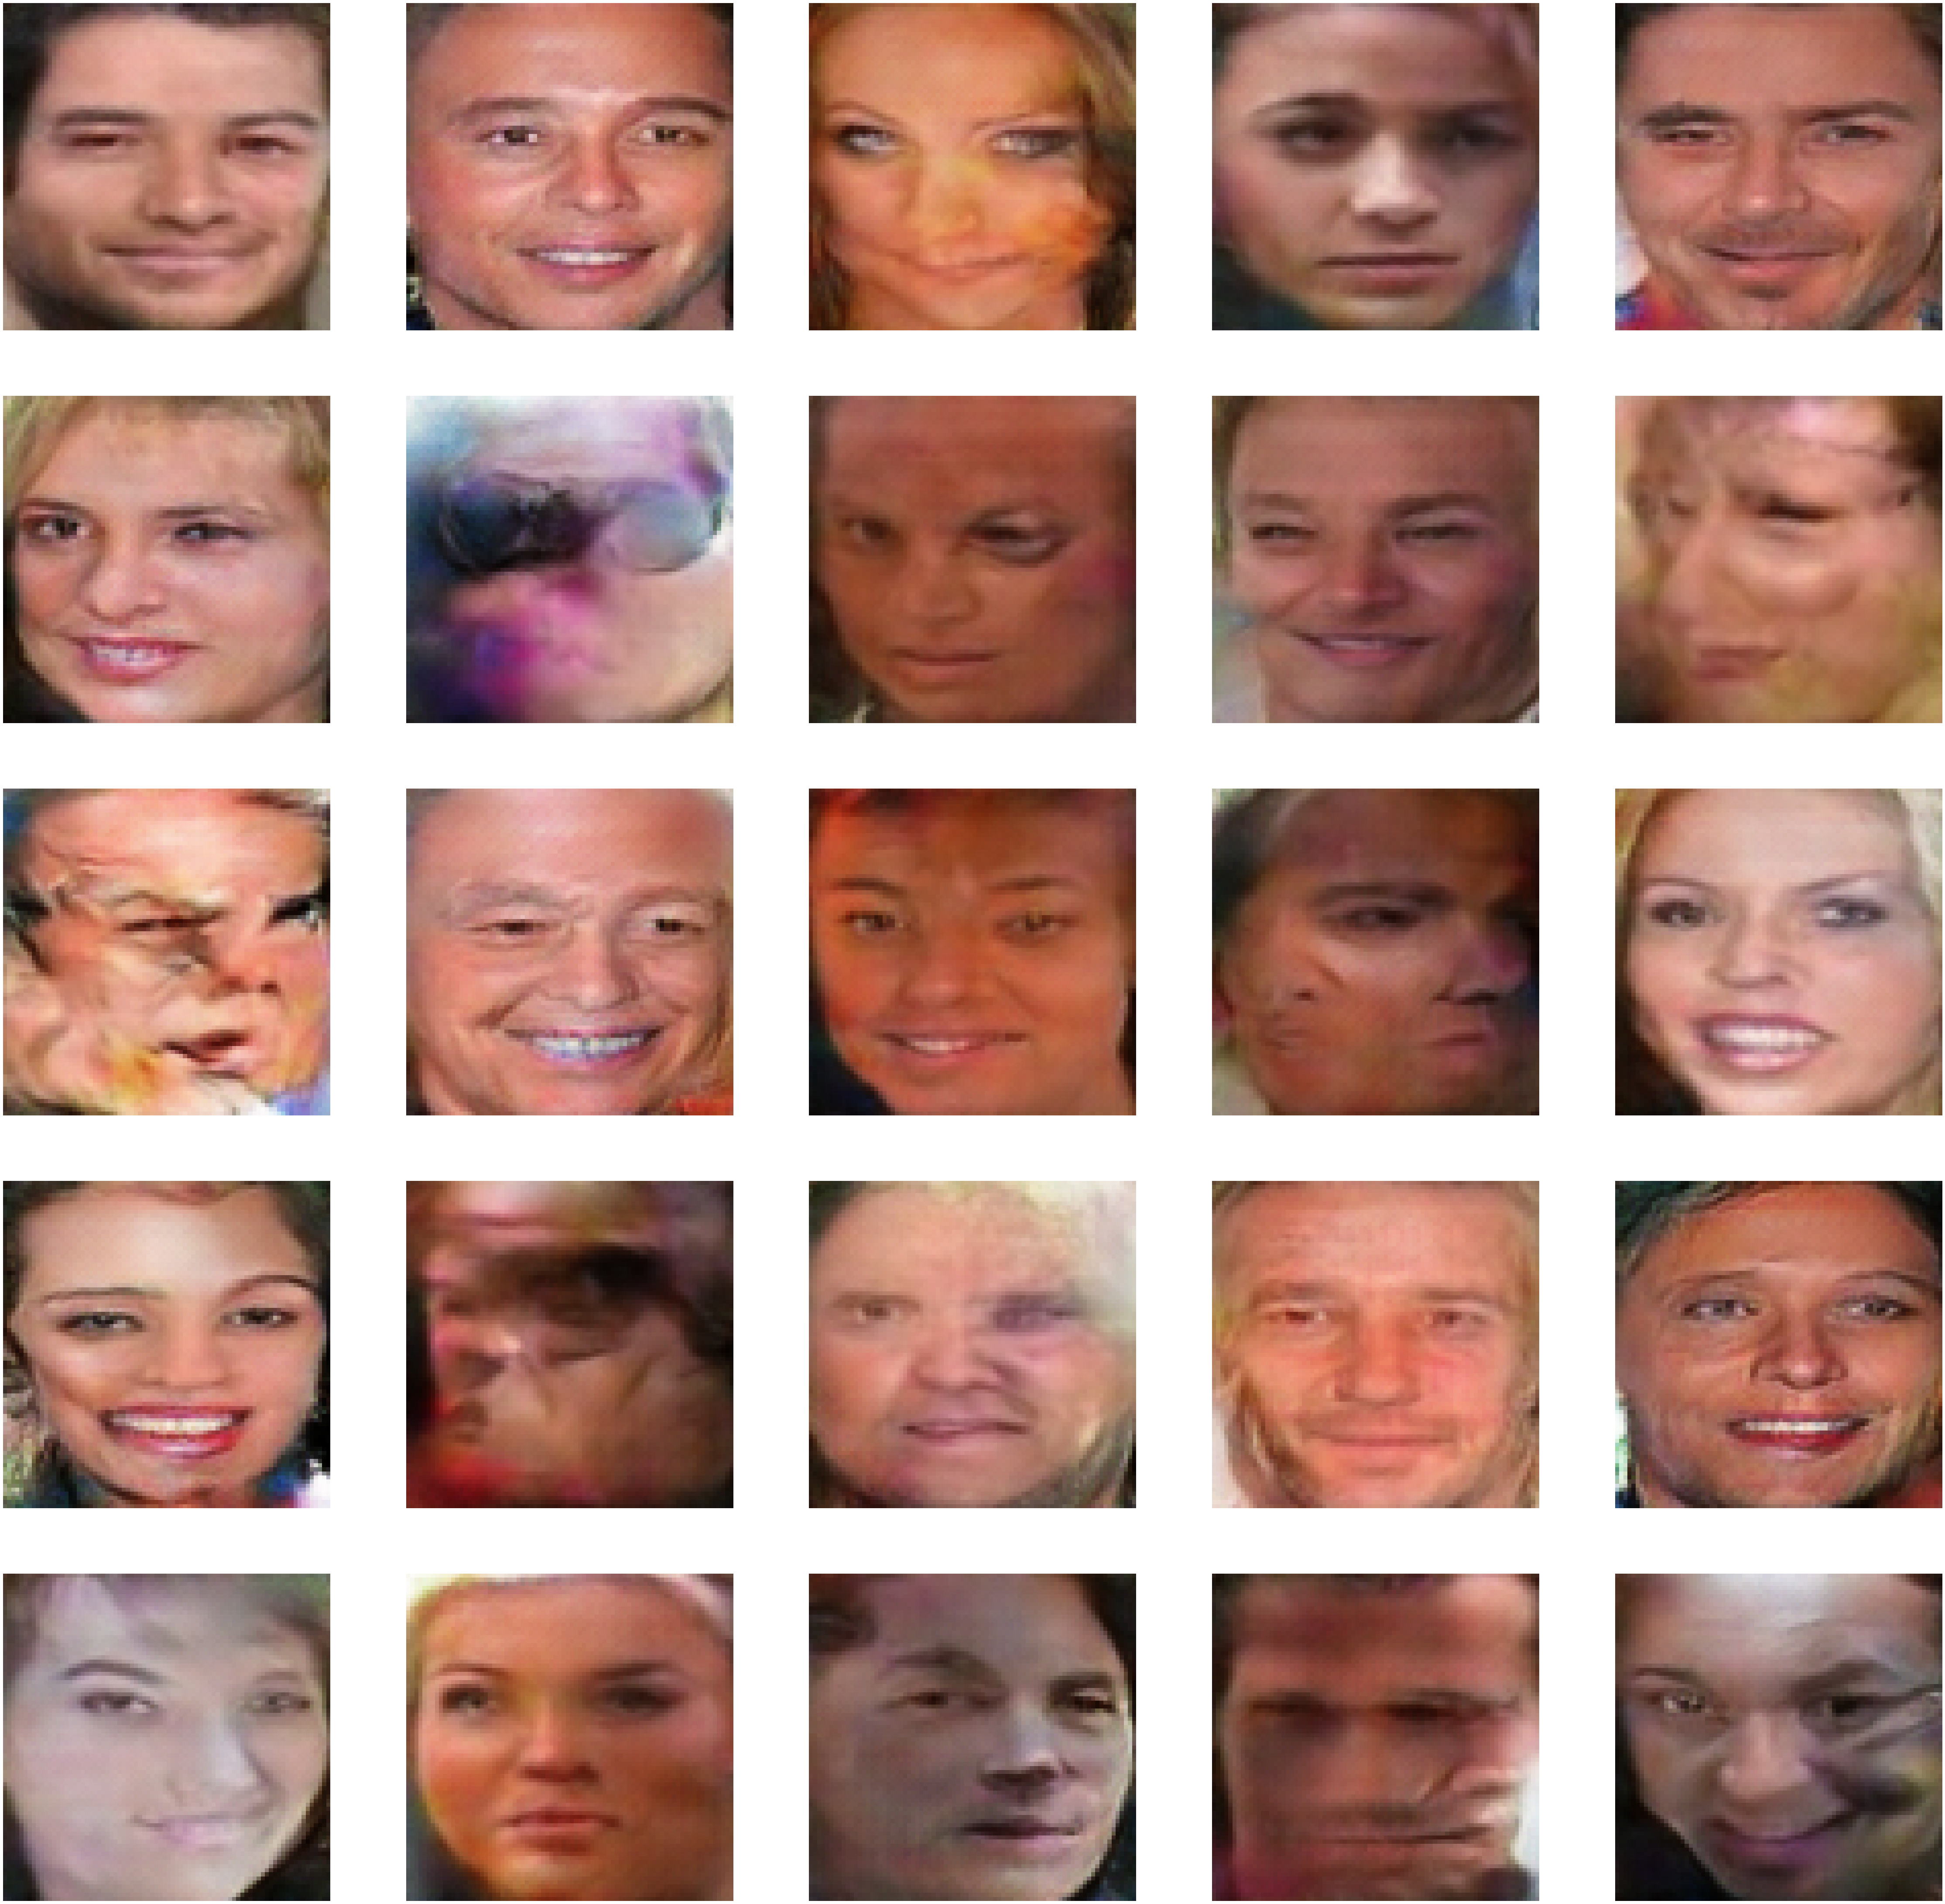

In [29]:
# load model
model = load_model(
    '/Users/xin/Documents/python_practice/GANsWithPython/chapter_9/models/generator_model_050.h5')
# generate images
latent_points = generate_latent_points(100,25)
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X+1)/2.0
# plot the result
plot_generated_images(X, 5, 80, '002')

In [31]:
# uniform interpolation between two points in latent space
def interpolate_points(p1, p2, n_steps=10):
    # interpolate ratios between the points
    ratios = linspace(0, 1, num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio*p2
        vectors.append(v)
    return asarray(vectors)

In [32]:
# example of interpolating between generated faces
from numpy import asarray, linspace

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in latent space
    x_input = randn(latent_dim*n_samples)
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

In [33]:
# uniform interpolation between two points in latent space
def interpolate_points(p1, p2, n_steps=10):
    # interpolate ratios between the points
    ratios = linspace(0,1,num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio * p2
        vectors.append(v)
    return asarray(vectors)

In [40]:
# create a plot of generated images
def plot_generated(examples, n):
    pyplot.figure(figsize=(20,20))
    for i in range(n):
        pyplot.subplot(1,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i,:,:])
    pyplot.show()

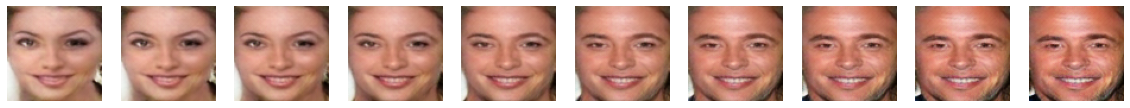

In [50]:
# load model
model = load_model(
    '/Users/xin/Documents/python_practice/GANsWithPython/chapter_9/models/generator_model_050.h5')

# generate points in latent space
pts = generate_latent_points(100,2)
# interpolate points in latent space
interpolated = interpolate_points(pts[0], pts[1])
# generate images
X = model.predict(interpolated)
# scale from [-1,1] to [0,1]
X = (X+1)/2.0
# plot result
plot_generated(X, len(interpolated))